In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos Multinível com 3 Níveis

Exemplo da aula do MBA DSA USP/ESALQ com Prof. Luiz Fávero

Modelos que reconhecem a existência de estruturas multinível ou hierárquicas. <br>

Melhor previsibilidade em relação aos Modelos OLS


Devemos testar se os termos aleatórios são estatisticamente diferentes de zero.<br> Se forem, os modelos tradicionais OLS não serão adequados.



### Contexto

Monitorar o estudando ao longo do tempo (meses)
Vários períodos aninhados em um estudante (mes 1, 2, 3 e 4 para observação i)

Período - Nível 1
Indivíduo - Nível 2
Escola - Nível 3

Desempenho no vestibular<br>
Atividades complementares <br>
Tempo de Experiência médio dos professores na referida escola <br>

In [43]:
df_tempo_estudante_escola = pd.read_csv(r'bases\tempo_estudante_escola.csv')
df_tempo_estudante_escola['escola'] = df_tempo_estudante_escola['escola'].astype('category')
df_tempo_estudante_escola['estudante'] = df_tempo_estudante_escola['estudante'].astype('category')
#df_tempo_estudante_escola['mes'] = df_tempo_estudante_escola['mes'].astype('str')
df_tempo_estudante_escola

,escola,estudante,mes,desempenho,ativ,texp
0,1,1,1,35.400002,não,2
1,1,1,2,44.400002,não,2
2,1,1,3,46.400002,não,2
3,1,1,4,52.400002,não,2
4,1,2,1,74.900002,não,2
...,...,...,...,...,...,...
2435,15,609,4,100.000000,sim,9
2436,15,610,1,87.599998,sim,9
2437,15,610,2,92.599998,sim,9
2438,15,610,3,94.599998,sim,9


In [6]:
df_tempo_estudante_escola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   escola      2440 non-null   category
 1   estudante   2440 non-null   category
 2   mes         2440 non-null   int64   
 3   desempenho  2440 non-null   float64 
 4   ativ        2440 non-null   object  
 5   texp        2440 non-null   int64   
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 105.1+ KB


In [7]:
# Descritivas
df_tempo_estudante_escola.describe()

,mes,desempenho,texp
count,2440.000000,2440.000000,2440.000000
mean,2.500000,68.341352,9.027869
std,1.118263,22.981531,7.655618
min,1.000000,10.500000,2.000000
25%,1.750000,49.574999,2.000000
50%,2.500000,70.300003,9.000000
75%,3.250000,88.500000,18.000000
max,4.000000,100.000000,20.000000


In [8]:
# Quantidade de estudantes
df_tempo_estudante_escola.estudante.nunique()

610

In [9]:
# Quantidade de alunos por mês
df_tempo_estudante_escola.mes.value_counts()

1    610
2    610
3    610
4    610
Name: mes, dtype: int64

In [11]:
df_tempo_estudante_escola.groupby('escola')['estudante'].nunique()

escola
1     47
2     25
3     48
4     20
5     48
6     30
7     28
8     35
9     44
10    33
11    57
12    62
13    53
14    27
15    53
Name: estudante, dtype: int64

### Gráfico da Média Temporal dos Alunos ao Longo do Tempo

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

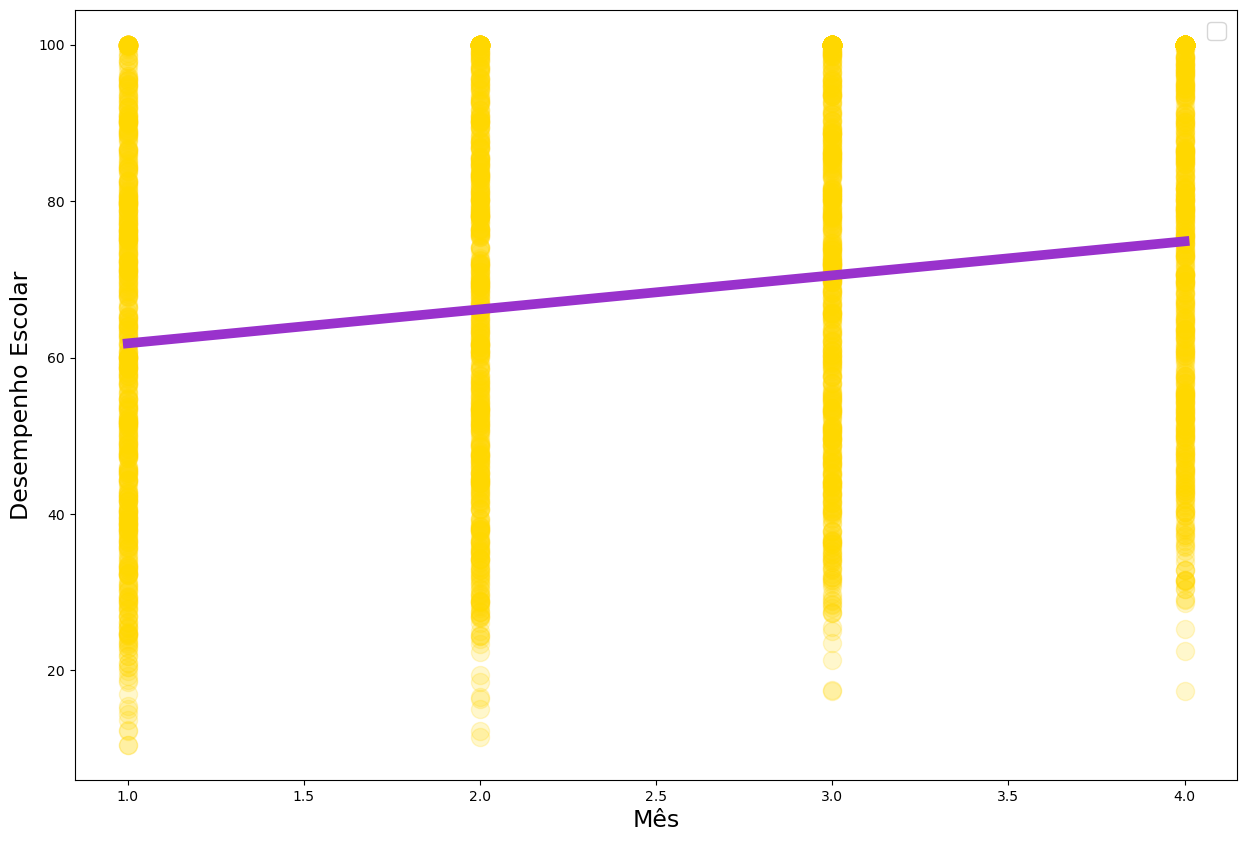

In [14]:
# Desempenho escolar médio dos estudantes em cada período
desempenho_medio_periodo = df_tempo_estudante_escola.groupby('mes')['desempenho'].mean().reset_index()
desempenho_medio_periodo

#%%
# Gráfico com a evolução do desempenho escolar médio dos estudantes em cada período
#(ajuste linear)

plt.figure(figsize=(15,10))
sns.regplot(df_tempo_estudante_escola['mes'], df_tempo_estudante_escola['desempenho'],
            data=df_tempo_estudante_escola, ci=None, marker='o',
            scatter_kws={'color':'gold', 's':170, 'alpha':0.2},
            line_kws={'color':'darkorchid', 'linewidth':7})
plt.xlabel('Mês', fontsize=17)
plt.ylabel('Desempenho Escolar', fontsize=17)
plt.legend(fontsize=17)
plt.show

### Kernel Density Estimation (KDE) - Função Densidade de Probabilidade da Variável Dependente (Desempenho)

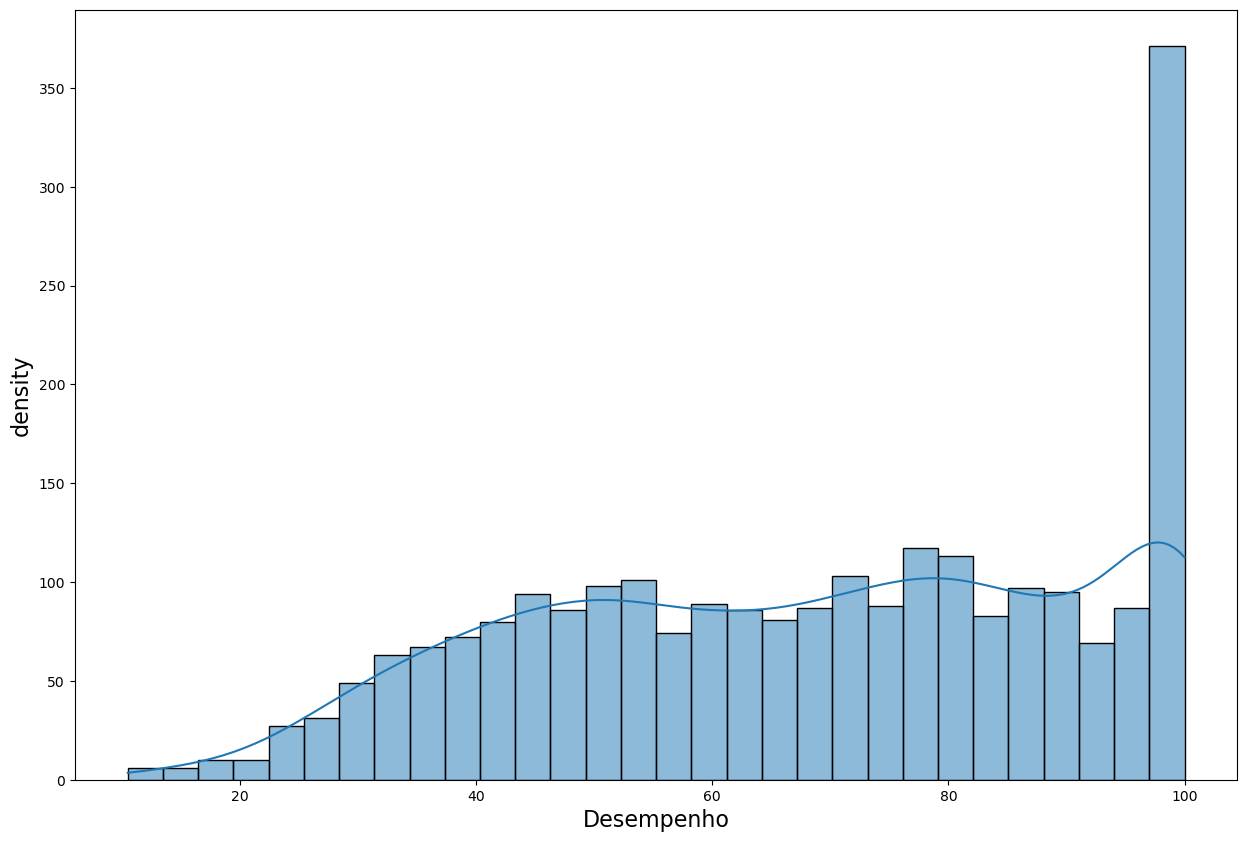

In [15]:
from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.histplot(df_tempo_estudante_escola.desempenho, kde=True, bins=30)
plt.xlabel('Desempenho', fontsize=16)
plt.ylabel('density', fontsize=16)
plt.show()

<Figure size 1500x1000 with 0 Axes>

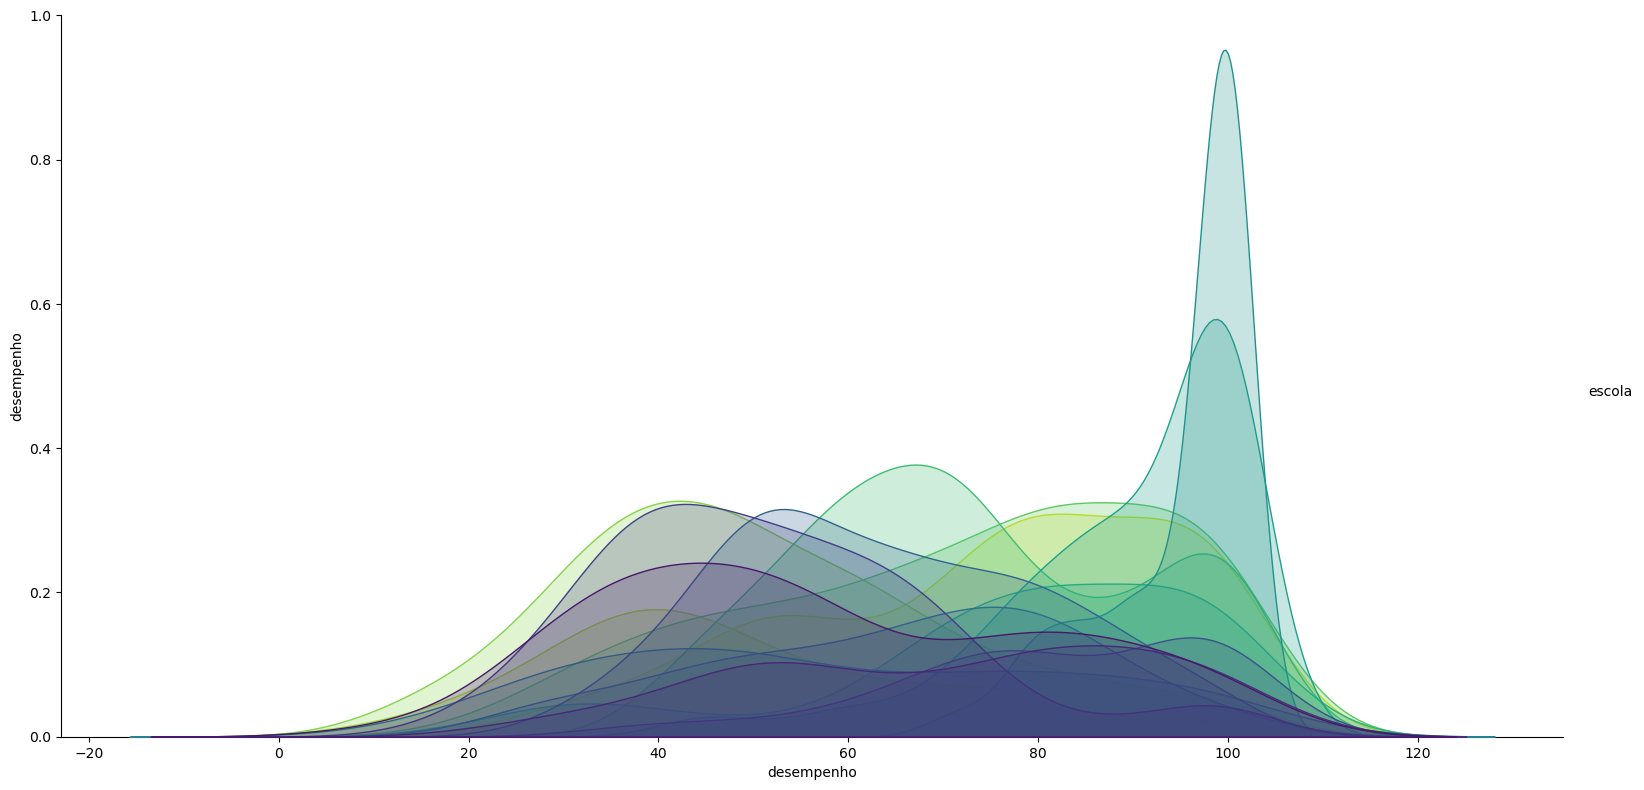

In [16]:
# Kernel density estimation (KDE) - função densidade de probabilidade da
#variável dependente ('desempenho') por escola
plt.figure(figsize=(15,10))
sns.pairplot(df_tempo_estudante_escola[['escola','desempenho']], hue='escola', height=8,
             aspect=2, palette='viridis')
plt.xlabel('Desempenho', fontsize=17)
plt.ylabel('Frequência', fontsize=17)
plt.show()

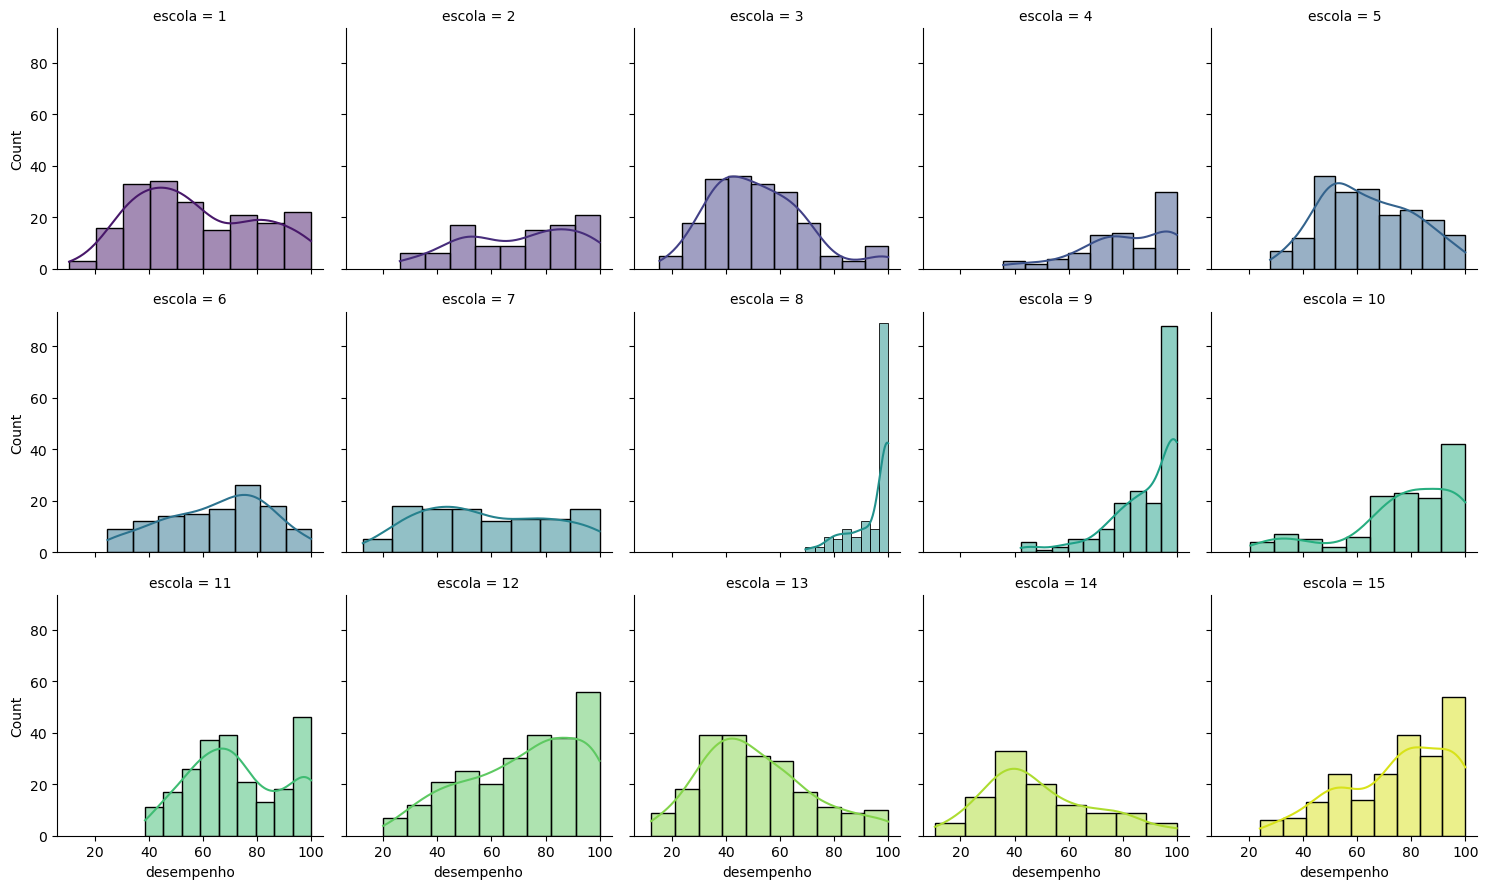

In [17]:
# Kernel density estimation (KDE) - função densidade de probabilidade da
#variável dependente ('desempenho'), com histograma e por escola separadamente
#(função 'FacetGrid' do pacote 'seaborn')

g = sns.FacetGrid(df_tempo_estudante_escola, 
                  col="escola", 
                  col_wrap=5, 
                  hue='escola', 
                  palette='viridis')
g.map_dataframe(sns.histplot, kde=True, x='desempenho')
plt.show()

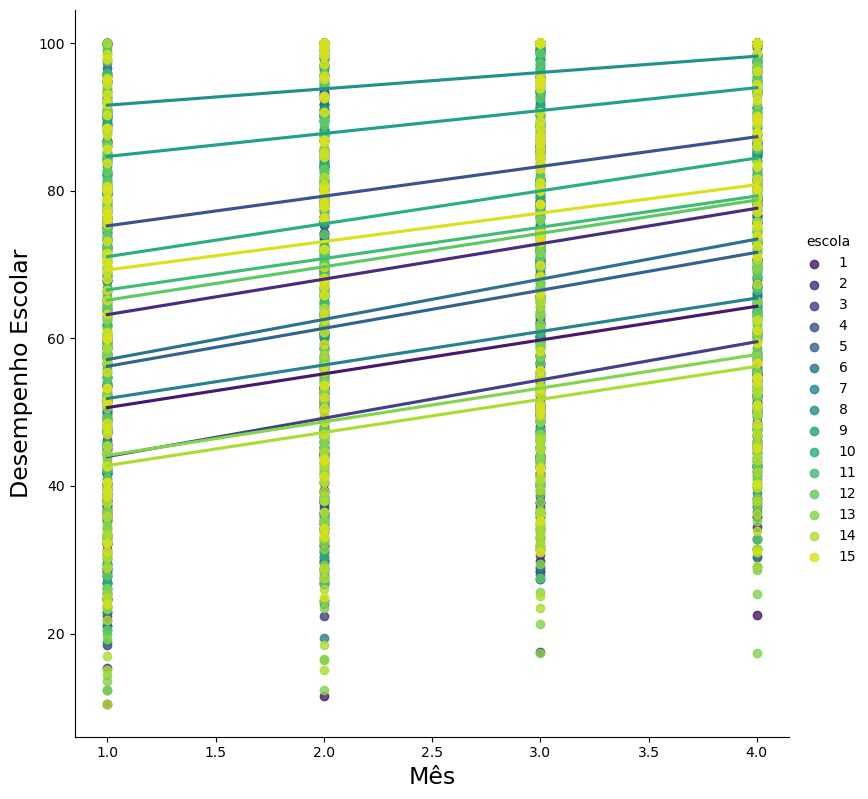

In [18]:
# Gráfico da evolução temporal do desempenho médio por escola (ajustes lineares)
# NOTE QUE A PERSPECTIVA MULTINÍVEL NATURALMENTE CONSIDERA O COMPORTAMENTO
#HETEROCEDÁSTICO NOS DADOS!

sns.lmplot(x='mes', y='desempenho', hue='escola', data=df_tempo_estudante_escola,
           height=8, palette='viridis', ci=False)
plt.ylabel('Desempenho Escolar', fontsize=17)
plt.xlabel('Mês', fontsize=17)
plt.show()

# Estimação do Modelo

# Step-up Strategy

- Análise do Modelo Nulo;
- Análise do Modelo com intercépto Aleatório;
- Análise do Modelo com intercépto e Inclinação aleatória (inclui variável X - define inclinação);

## Estimação do Modelo Nulo

Avaliar o LogLike para verificar se existe significância estatística da variância do efeito aleatório de intercépto. <br>
Caso não tenha, partimos para o modelo OLS

**Testando se os termos aleatórios são estatisticamente diferentes de zero**

se V0j for estatisticamente igual a 0, vale a aplicação do modelo OLS

In [49]:
#https://www.statsmodels.org/stable/mixed_linear.html
import statsmodels.api as sm

vc = {'estudante': '0 + C(estudante)'}

modelo_nulo_hlm3 = sm.MixedLM.from_formula("desempenho ~ 1",  
                                           groups='escola',
                                           re_formula='1', 
                                           vc_formula=vc,
                                          data=df_tempo_estudante_escola).fit()
modelo_nulo_hlm3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:             MixedLM Dependent Variable: desempenho
No. Observations:  2440    Method:             REML      
No. Groups:        15      Scale:              41.6494   
Min. group size:   80      Log-Likelihood:     -9092.1387
Max. group size:   248     Converged:          Yes       
Mean group size:   162.7                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      68.714    3.553 19.337 0.000 61.749 75.679
escola Var    180.222   11.137                           
estudante Var 325.798    3.477                           
=========================================================

"""

Modelo:

> DESEMPENHOij = 68,71 + v0jk + t00k + ERROtjk

v0jk: efeito aleatório nível estudante <br>
t00k: efeito aleatório nível escola

Verificando efeito aleatório de intercepto:
<br>

<center><b>V0j (estudante var) = 325,80 p-value = 0,00</b></center>
<center><b>t00k (Group Var ) = 180,222 p-value: 0,012</b> </center>

> H0: É estatisticamente significante igual a 0 <br>
> H1: É estatisticamente diferente de 0

p-value < 0,05 rejeita-se H0

Então existem diferenças no desempenho de alunos provenientes de escolas diferentes.

In [21]:
modelo_nulo_hlm3.pvalues.round(5)

Intercept        0.00000
escola Var       0.01216
estudante Var    0.00000
dtype: float64

#### ICC (Intraclass Correlation)

Qual a importância relativa do efeito escola e estudante sobre o desempenho?

In [22]:
icc_escola = (180.222) / (180.222 + 325.798 + modelo_nulo_hlm3.scale)
icc_escola
# 32,9% da variação do desempenho é devido ao efeito escola

0.32907079194060157

In [23]:
icc_estudante = (325.798) / (180.222 + 325.798 + modelo_nulo_hlm3.scale)
icc_estudante
# 59,5% da variação do desempenho é devido ao efeito estudante

0.5948807907617499

In [24]:
icc_tempo = 1- icc_escola - icc_estudante
icc_tempo
# Apenas 7,6% da variação do desempenho é devido ao efeito tempo

0.07604841729764855

### Comparando HLM3 com OLS Nulo

In [32]:
modelo_ols_nulo = sm.OLS.from_formula("desempenho ~ 1", df_tempo_estudante_escola).fit()
modelo_ols_nulo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desempenho   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                ter, 02 mai 2023   Prob (F-statistic):                nan
Time:                        21:16:16   Log-Likelihood:                -11110.
No. Observations:                2440   AIC:                         2.222e+04
Df Residuals:                    2439   BIC:                         2.223e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.3414      0.465    146.892      0.000      67.429      69.254
==============================================================================
Omnibus:                      742.376   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.934
Skew:                          -0.230   Prob(JB):                     8.25e-30
Kurtosis:                       1.949   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comparativo do Ganho de Loglike Entre Modelo Nulo OLS e Modelo Nulo Multinível

In [26]:
#Função para Verificar estatisticamente ganho no LogLike entre os Modelos
from scipy.stats import chi2

def llr_test (model_ref, model_test):
    
    if model_ref == model_test:

        stats_chi2 = -2*(model_ref.llnull - model_test.llf)
        
        return print(f"""LogLike Modelo Nulo: {model_ref.llnull:.2f}
LogLike Modelo: {model_test.llf:.2f}
Estatistica Chi2: {stats_chi2:.2f}
P-value Chi2: {1-chi2.cdf(stats_chi2, df=model_test.df_modelwc)}""")
            
    else:
        
        stats_chi2 = -2*(model_ref.llf - model_test.llf)
        
        return print(f"""LogLike Modelo Ref: {model_ref.llf:.2f}
LogLike Modelo: {model_test.llf:.2f} 
Estatistica Chi2: {stats_chi2:.2f}
P-value Chi2: {1-chi2.cdf(stats_chi2, df=model_test.df_modelwc)}""")

In [27]:
llr_test(modelo_ols_nulo, modelo_nulo_hlm3)

LogLike Modelo Ref: -11110.36
LogLike Modelo: -9092.14 
Estatistica Chi2: 4036.43
P-value Chi2: 0.0


Text(0.5, 1.0, 'Comparação do LL')

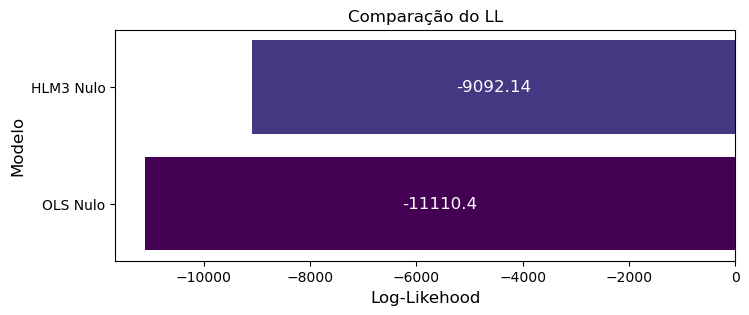

In [50]:
#Definição do dataframe com os modelos e respectivos LL
df_llf = pd.DataFrame({'modelo':['OLS Nulo','HLM3 Nulo'],
                      'loglik':[modelo_ols_nulo.llf,
                                modelo_nulo_hlm3.llf]})
df_llf

#Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(8,3))

c = ["#440154FF", "#453781FF", "#22A884FF", "orange", "green"]

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=12)
ax.set_ylabel("Modelo", fontsize=12)
ax.set_xlabel("Log-Likehood", fontsize=12)
plt.title('Comparação do LL')

### Modelo HLM3 com Tendência Linear e Interceptos e Inclinações Aleatórias

In [44]:
#Componentes aleatórios de inclinação
vc = {'estudante': '0 + estudante','mes': '0 + mes'}

modelo_intercept_inclin_hlm3_stats = sm.MixedLM.from_formula("desempenho ~ mes", 
                                           df_tempo_estudante_escola, 
                                           groups=df_tempo_estudante_escola['escola'], 
                                            re_formula='1',
                                            vc_formula=vc).fit()
modelo_intercept_inclin_hlm3_stats.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:             MixedLM Dependent Variable: desempenho
No. Observations:  2440    Method:             REML      
No. Groups:        15      Scale:              9.2424    
Min. group size:   80      Log-Likelihood:     -7735.8750
Max. group size:   248     Converged:          Yes       
Mean group size:   162.7                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      57.860    3.937 14.695 0.000 50.142 65.577
mes             4.344    0.210 20.697 0.000  3.932  4.755
Group Var     223.052   29.021                           
estudante Var 333.899    7.389                           
mes Var         0.610    0.082                           
=========================================================

"""

In [ ]:
# A partir deste momento, iremos estimar os modelos multinível HLM3 com medidas
#repetidas por meio da função 'Lmer' do pacote 'pymer4.models', já que esta
#função permite que sejam considerados efeitos aleatórios de inclinação para
#os níveis 2 e 3 simultaneamente, ao contrário da função 'MixedLM' do pacote
#'statsmodels', que permite a inclusão de tais efeitos em apenas um dos níveis
#contextuais

> Escola Intercepto Var(t00k): 255.469

> Escola Var(t10k): 0.553

> Estudante Intercepto Var(v0jk): 388.982

> Estudante Var(v1jk): 3.325

In [36]:
from pymer4.models import Lmer #estimação de modelos HLM3 neste código

# Transformação das variáveis 'estudante' e 'escola' para 'int64', a fim de que
#seja possível estimar os modelos multinível por meio da função 'Lmer' do
#pacote 'pymer4.models'
df_tempo_estudante_escola['estudante'] = df_tempo_estudante_escola['estudante'].astype('int64')
df_tempo_estudante_escola['escola'] = df_tempo_estudante_escola['escola'].astype('int64')

# Estimação do modelo nulo (função 'Lmer' do pacote 'pymer4.models')
modelo_intercept_inclin_hlm3 = Lmer(formula='desempenho ~ mes + (mes|escola) + (mes|estudante)',
                        data=df_tempo_estudante_escola)

# Parâmetros do 'modelo_nulo_hlm3'
modelo_intercept_inclin_hlm3.fit(old_optimizer=(True))

modelo_intercept_inclin_hlm3.grps

Linear mixed model fit by REML [’lmerMod’]
Formula: desempenho~mes+(mes|escola)+(mes|estudante)

Family: gaussian	 Inference: parametric

Number of observations: 2440	 Groups: {'estudante': 610.0, 'escola': 15.0}

Log-likelihood: -7411.506 	 AIC: 14841.013

Random effects:

                  Name      Var     Std
estudante  (Intercept)  388.982  19.723
estudante          mes    3.325   1.823
escola     (Intercept)  225.469  15.016
escola             mes    0.553   0.744
Residual                  3.795   1.948

                   IV1  IV2   Corr
estudante  (Intercept)  mes -0.414
escola     (Intercept)  mes -0.880

Fixed effects:



{'estudante': 610.0, 'escola': 15.0}

In [62]:
# LLr Test Para Modelo Função LMER

def llr_test_lmer (model_ref, model_test):
    
    if model_ref == model_test:

        stats_chi2 = -2*(model_ref.llnull - model_test.logLike)
        
        return print(f"""LogLike Modelo Nulo: {model_ref.llnull:.2f}
LogLike Modelo: {model_test.logLike:.2f}
Estatistica Chi2: {stats_chi2:.2f}
P-value Chi2: {1-chi2.cdf(stats_chi2, df=1)}""")
            
    else:
        
        stats_chi2 = -2*(model_ref.llf - model_test.logLike)
        
        return print(f"""LogLike Modelo Ref: {model_ref.llf:.2f}
LogLike Modelo: {model_test.logLike:.2f} 
Estatistica Chi2: {stats_chi2:.2f}
P-value Chi2: {1-chi2.cdf(stats_chi2, df=1)}""")

# Aplicando a Função
llr_test_lmer(modelo_nulo_hlm3, modelo_intercept_inclin_hlm3)

LogLike Modelo Ref: -9092.14
LogLike Modelo: -7411.51 
Estatistica Chi2: 3361.26
P-value Chi2: 0.0


Text(0.5, 1.0, 'Comparação do LL')

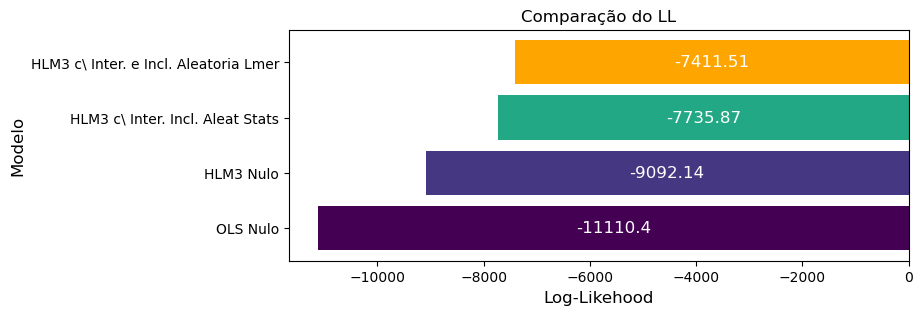

In [63]:
#Definição do dataframe com os modelos e respectivos LL
df_llf = pd.DataFrame({'modelo':['OLS Nulo',
                                 'HLM3 Nulo', 
                                 'HLM3 c\ Inter. Incl. Aleat Stats',
                                 'HLM3 c\ Inter. e Incl. Aleatoria Lmer'],
                      'loglik':[modelo_ols_nulo.llf,
                                modelo_nulo_hlm3.llf,
                                modelo_intercept_inclin_hlm3_stats.llf,
                                modelo_intercept_inclin_hlm3.logLike]})
df_llf

#Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(8,3))

c = ["#440154FF", "#453781FF", "#22A884FF", "orange", "green"]

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=12)
ax.set_ylabel("Modelo", fontsize=12)
ax.set_xlabel("Log-Likehood", fontsize=12)
plt.title('Comparação do LL')

# Modelo Final HLM3

### Utilizando Biblioteca Statsmodels

In [66]:
#Componentes aleatórios de inclinação

df_tempo_estudante_escola['estudante'] = df_tempo_estudante_escola['estudante'].astype('category')
df_tempo_estudante_escola['escola'] = df_tempo_estudante_escola['escola'].astype('category')


vc = {'mes': '0 + mes', 'estudante': '0 + C(estudante)'}

modelo_completo_hlm3_stats = sm.MixedLM.from_formula("desempenho ~ mes + C(ativ) + texp + ativ:mes + texp:mes", 
                                           df_tempo_estudante_escola, 
                                           groups=df_tempo_estudante_escola['escola'], 
                                            re_formula='1',
                                            vc_formula=vc).fit()
modelo_completo_hlm3_stats.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  desempenho
No. Observations:  2440     Method:              REML      
No. Groups:        15       Scale:               9.1302    
Min. group size:   80       Log-Likelihood:      -7686.9488
Max. group size:   248      Converged:           Yes       
Mean group size:   162.7                                   
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        40.034    3.826 10.464 0.000 32.535 47.533
C(ativ)[T.sim]   14.705    1.695  8.673 0.000 11.382 18.027
mes               5.178    0.233 22.255 0.000  4.722  5.634
ativ[T.sim]:mes  -0.637    0.128 -4.981 0.000 -0.888 -0.386
texp              1.178    0.343  3.435 0.001  0.506  1.850
texp:mes         -0.059    0.021 -2.833 0.005 -0.099 -0.018
Group Var        88.118   12.611                           
estudante Var   303.614    6.767                           
mes Var           0.301    0.045                           
===========================================================

"""

In [68]:
llr_test(modelo_intercept_inclin_hlm3_stats, modelo_completo_hlm3)

LogLike Modelo Ref: -7735.87
LogLike Modelo: -7686.95 
Estatistica Chi2: 97.85
P-value Chi2: 0.0


## Utilizando a Biblioteca Pymer4

In [74]:
# Dummização da variável preditora qualitativa 'ativ', a fim de que seja possível
#estabelecer, adiante, as funções para a definição dos efeitos aleatórios dos
#níveis contextuais.
df_tempo_estudante_escola_dumm = pd.get_dummies(df_tempo_estudante_escola,
                                       columns=['ativ'],
                                       drop_first=True)
df_tempo_estudante_escola_dumm

,escola,estudante,mes,desempenho,texp,ativ_sim
0,1,1,1,35.400002,2,0
1,1,1,2,44.400002,2,0
2,1,1,3,46.400002,2,0
3,1,1,4,52.400002,2,0
4,1,2,1,74.900002,2,0
...,...,...,...,...,...,...
2435,15,609,4,100.000000,9,1
2436,15,610,1,87.599998,9,1
2437,15,610,2,92.599998,9,1
2438,15,610,3,94.599998,9,1


In [81]:
# Transformação das variáveis 'estudante' e 'escola' para 'int64', a fim de que
#seja possível estimar os modelos multinível por meio da função 'Lmer' do
#pacote 'pymer4.models'
df_tempo_estudante_escola_dumm['estudante'] = df_tempo_estudante_escola_dumm['estudante'].astype('int64')
df_tempo_estudante_escola_dumm['escola'] = df_tempo_estudante_escola_dumm['escola'].astype('int64')

# Estimação do modelo nulo (função 'Lmer' do pacote 'pymer4.models')
modelo_completo_hlm3_lmer = Lmer('desempenho ~ mes + ativ_sim + texp +\
                                  ativ_sim:mes + texp:mes + ativ_sim:texp +\
                                      (mes|escola) + (mes|estudante)',
                                      data = df_tempo_estudante_escola_dumm)

# Parâmetros do 'modelo_completo_final_hlm3'
modelo_completo_hlm3_lmer.fit(old_optimizer=(True))

modelo_completo_hlm3_lmer.grps

Linear mixed model fit by REML [’lmerMod’]
Formula: desempenho~mes+ativ_sim+texp+ativ_sim:mes+texp:mes+ativ_sim:texp+(mes|escola)+(mes|estudante)

Family: gaussian	 Inference: parametric

Number of observations: 2440	 Groups: {'estudante': 610.0, 'escola': 15.0}

Log-likelihood: -7377.011 	 AIC: 14782.022

Random effects:

                  Name      Var     Std
estudante  (Intercept)  351.567  18.750
estudante          mes    3.258   1.805
escola     (Intercept)   88.104   9.386
escola             mes    0.255   0.505
Residual                  3.795   1.948

                   IV1  IV2   Corr
estudante  (Intercept)  mes -0.392
escola     (Intercept)  mes -0.681

Fixed effects:



{'estudante': 610.0, 'escola': 15.0}

> Escola Intercepto Var(t00k): 88.104

> Escola Var(t10k): 0.25

> Estudante Intercepto Var(v0jk): 351.567

> Estudante Var(v1jk): 3.258

In [85]:
# LLr Test Para Modelo Função LMER

def llr_test_lmer (model_ref, model_test):
    
    if model_ref == model_test:

        stats_chi2 = -2*(model_ref.llnull - model_test.logLike)
        
        return print(f"""LogLike Modelo Nulo: {model_ref.llnull:.2f}
LogLike Modelo: {model_test.logLike:.2f}
Estatistica Chi2: {stats_chi2:.2f}
P-value Chi2: {1-chi2.cdf(stats_chi2, df=1)}""")
            
    else:
        
        stats_chi2 = -2*(model_ref.logLike - model_test.logLike)
        
        return print(f"""LogLike Modelo Ref: {model_ref.logLike:.2f}
LogLike Modelo: {model_test.logLike:.2f} 
Estatistica Chi2: {stats_chi2:.2f}
P-value Chi2: {1-chi2.cdf(stats_chi2, df=1):.2f}""")


llr_test_lmer(modelo_intercept_inclin_hlm3, modelo_completo_hlm3_lmer)

LogLike Modelo Ref: -7411.51
LogLike Modelo: -7377.01 
Estatistica Chi2: 68.99
P-value Chi2: 0.00


Text(0.5, 1.0, 'Comparação do LL')

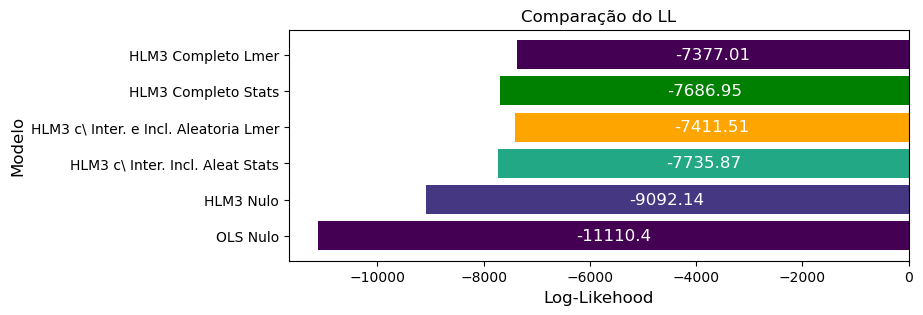

In [82]:
#Definição do dataframe com os modelos e respectivos LL
df_llf = pd.DataFrame({'modelo':['OLS Nulo',
                                 'HLM3 Nulo', 
                                 'HLM3 c\ Inter. Incl. Aleat Stats',
                                 'HLM3 c\ Inter. e Incl. Aleatoria Lmer', 
                                 'HLM3 Completo Stats', 
                                 'HLM3 Completo Lmer'],
                      'loglik':[modelo_ols_nulo.llf,
                                modelo_nulo_hlm3.llf,
                                modelo_intercept_inclin_hlm3_stats.llf,
                                modelo_intercept_inclin_hlm3.logLike, 
                                modelo_completo_hlm3_stats.llf, 
                                modelo_completo_hlm3_lmer.logLike]})
df_llf

#Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(8,3))

c = ["#440154FF", "#453781FF", "#22A884FF", "orange", "green"]

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=12)
ax.set_ylabel("Modelo", fontsize=12)
ax.set_xlabel("Log-Likehood", fontsize=12)
plt.title('Comparação do LL')

### Visualização dos valores de r0jk e r1jk
#### (efeitos aleatórios de intercepto e de inclinação no nível estudante, respectivamente)  <br> 

### E Visualização dos valores u00k e u10k
#### (efeitos aleatórios de intercepto e de inclinação no nível escola, respectivamente)

In [88]:
# Nível estudante
aleat_estudante = pd.DataFrame(modelo_completo_hlm3_lmer.ranef[0]).dropna()
aleat_estudante = aleat_estudante.rename(columns={'X.Intercept.':'r0jk','mes':'r1jk'})
aleat_estudante = aleat_estudante.reset_index().rename(columns={'index': 'estudante'})
aleat_estudante


,estudante,r0jk,r1jk
0,1,-8.349835,0.318299
1,2,31.586991,-2.691731
2,3,27.451421,0.155097
3,4,-4.357805,-2.695787
4,5,18.993245,1.711065
...,...,...,...
605,606,-12.098848,-2.654030
606,607,15.390670,0.458889
607,608,1.821808,0.662686
608,609,-0.383389,3.311204


In [89]:
# Nível escola
aleat_escola = pd.DataFrame(modelo_completo_hlm3_lmer.ranef[1]).dropna()
aleat_escola = aleat_escola.rename(columns={'X.Intercept.':'u00k','mes':'u10k'})
aleat_escola = aleat_escola.reset_index().rename(columns={'index': 'escola'})
aleat_escola

,escola,u00k,u10k
0,1,-2.078048,-0.117140
1,2,6.786803,-0.045325
2,3,-7.972371,0.320444
3,4,4.906397,-0.073350
4,5,0.113464,0.322031
5,6,0.101144,0.433552
6,7,-2.657516,-0.050135
7,8,10.157412,-0.806199
8,9,7.253629,-0.394006
9,10,16.171517,-0.391799


## Gráfico para visualização do comportamento dos valores de r0jk

Interceptos aleatórios por estudante

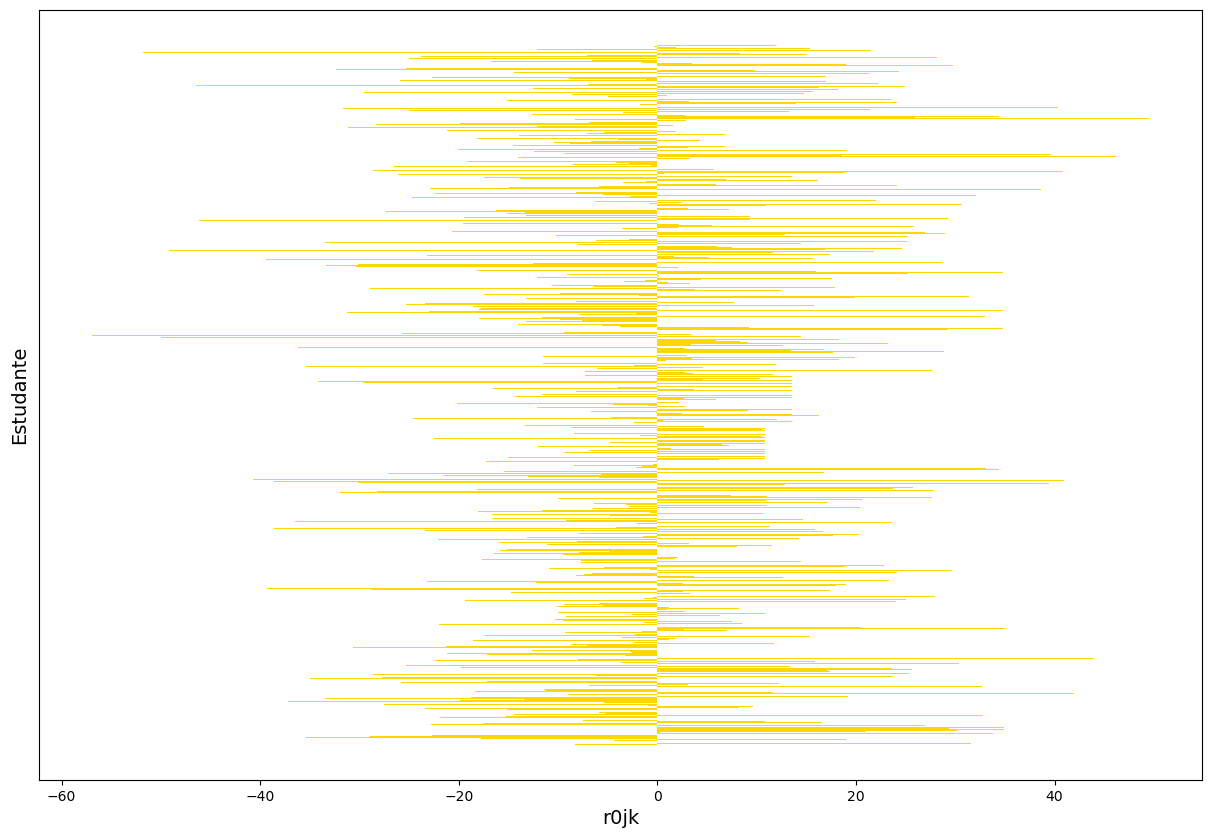

In [90]:
# Gráfico para visualização do comportamento dos valores de r0jk, ou seja,
#dos interceptos aleatórios por estudante

plt.figure(figsize=(15,10))
plt.barh(aleat_estudante['estudante'], aleat_estudante['r0jk'], color='gold')
plt.ylabel('Estudante', fontsize=14)
plt.yticks([])
plt.xlabel('r0jk', fontsize=14)
plt.show()

## Gráfico para visualização do comportamento dos valores de r1jk
Inclinações aleatórias por estudante

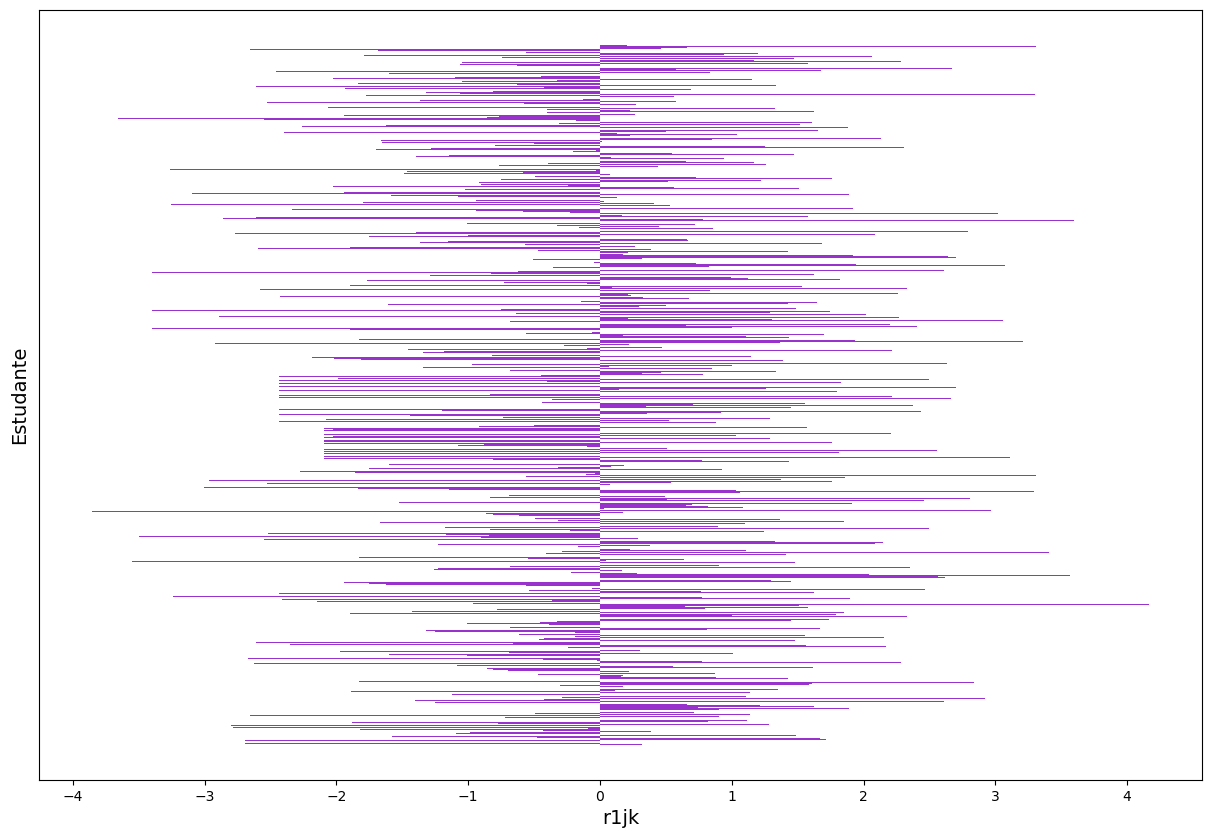

In [91]:
# Gráfico para visualização do comportamento dos valores de r1jk, ou seja,
#das inclinações aleatórias por estudante

plt.figure(figsize=(15,10))
plt.barh(aleat_estudante['estudante'], aleat_estudante['r1jk'], color='darkorchid')
plt.ylabel('Estudante', fontsize=14)
plt.yticks([])
plt.xlabel('r1jk', fontsize=14)
plt.show()

## Gráfico para visualização do comportamento dos valores de u10k, 
Inclinações aleatórias por escola

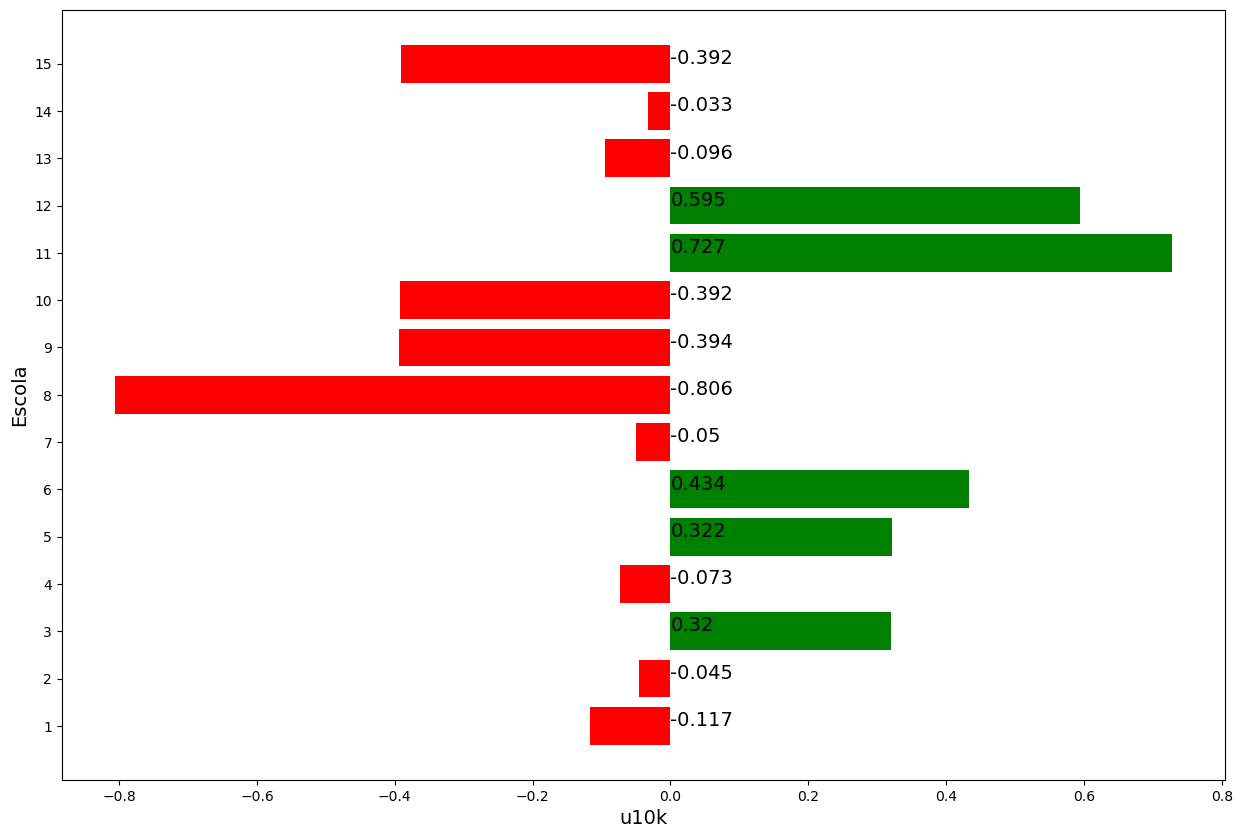

In [92]:
# Gráfico para visualização do comportamento dos valores de u10k, ou seja,
#das inclinações aleatórias por escola

colors = ['green' if x>0 else 'red' for x in aleat_escola['u10k']]

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(0, point['y'], str(round(point['x'],3)), fontsize=14)

plt.figure(figsize=(15,10))
plt.barh(aleat_escola['escola'], aleat_escola['u10k'], color=colors)

label_point(x = aleat_escola['u10k'],
            y = aleat_escola['escola'],
            val = aleat_escola['u10k'],
            ax = plt.gca()) 
plt.ylabel('Escola', fontsize=14)
plt.xlabel('u10k', fontsize=14)
plt.show()